# Import the packages

In [2]:
import pipeline as pi
from tifffile import imread,imwrite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
from placozoan.func_segmentation import segmentation_chanvese,get_holes_mask
from placozoan.base_features import SingleObjectFeatures
from scipy.spatial.distance import cdist
from skimage.measure import label, regionprops_table
from scipy.optimize import linear_sum_assignment 

# Preprocessing

## Steps:
    
    - Increase the contrast of the image 
    - Segmenting the algae plane per plane
    - Removing them from background

In [ ]:
start = time.time()

In [16]:
preprocessed,alg_mask = pi.preprocessing('../data/tricho_wound.tif')

Increasing the contrast...
--------------------------------------------------------------
Done with the contrast!
--------------------------------------------------------------
Segmenting the algae...
--------------------------------------------------------------
0.00 % done ...
0.10 % done ...
0.19 % done ...
0.29 % done ...
0.38 % done ...
0.48 % done ...
0.58 % done ...
0.67 % done ...
0.77 % done ...
0.87 % done ...
0.96 % done ...
1.06 % done ...
1.15 % done ...
1.25 % done ...
1.35 % done ...
1.44 % done ...
1.54 % done ...
1.64 % done ...
1.73 % done ...
1.83 % done ...
1.92 % done ...
2.02 % done ...
2.12 % done ...
2.21 % done ...
2.31 % done ...
2.41 % done ...
2.50 % done ...
2.60 % done ...
2.69 % done ...
2.79 % done ...
2.89 % done ...
2.98 % done ...
3.08 % done ...
3.18 % done ...
3.27 % done ...
3.37 % done ...
3.46 % done ...
3.56 % done ...
3.66 % done ...
3.75 % done ...
3.85 % done ...
3.95 % done ...
4.04 % done ...
4.14 % done ...
4.23 % done ...
4.33 % done ...


45.81 % done ...
45.91 % done ...
46.01 % done ...
46.10 % done ...
46.20 % done ...
46.29 % done ...
46.39 % done ...
46.49 % done ...
46.58 % done ...
46.68 % done ...
46.78 % done ...
46.87 % done ...
46.97 % done ...
47.06 % done ...
47.16 % done ...
47.26 % done ...
47.35 % done ...
47.45 % done ...
47.55 % done ...
47.64 % done ...
47.74 % done ...
47.83 % done ...
47.93 % done ...
48.03 % done ...
48.12 % done ...
48.22 % done ...
48.32 % done ...
48.41 % done ...
48.51 % done ...
48.60 % done ...
48.70 % done ...
48.80 % done ...
48.89 % done ...
48.99 % done ...
49.09 % done ...
49.18 % done ...
49.28 % done ...
49.37 % done ...
49.47 % done ...
49.57 % done ...
49.66 % done ...
49.76 % done ...
49.86 % done ...
49.95 % done ...
50.05 % done ...
50.14 % done ...
50.24 % done ...
50.34 % done ...
50.43 % done ...
50.53 % done ...
50.63 % done ...
50.72 % done ...
50.82 % done ...
50.91 % done ...
51.01 % done ...
51.11 % done ...
51.20 % done ...
51.30 % done ...
51.40 % done .

92.20 % done ...
92.30 % done ...
92.40 % done ...
92.49 % done ...
92.59 % done ...
92.69 % done ...
92.78 % done ...
92.88 % done ...
92.97 % done ...
93.07 % done ...
93.17 % done ...
93.26 % done ...
93.36 % done ...
93.46 % done ...
93.55 % done ...
93.65 % done ...
93.74 % done ...
93.84 % done ...
93.94 % done ...
94.03 % done ...
94.13 % done ...
94.23 % done ...
94.32 % done ...
94.42 % done ...
94.51 % done ...
94.61 % done ...
94.71 % done ...
94.80 % done ...
94.90 % done ...
95.00 % done ...
95.09 % done ...
95.19 % done ...
95.28 % done ...
95.38 % done ...
95.48 % done ...
95.57 % done ...
95.67 % done ...
95.77 % done ...
95.86 % done ...
95.96 % done ...
96.05 % done ...
96.15 % done ...
96.25 % done ...
96.34 % done ...
96.44 % done ...
96.54 % done ...
96.63 % done ...
96.73 % done ...
96.82 % done ...
96.92 % done ...
97.02 % done ...
97.11 % done ...
97.21 % done ...
97.31 % done ...
97.40 % done ...
97.50 % done ...
97.59 % done ...
97.69 % done ...
97.79 % done .

# Drift computation

## Steps:

### Computing the drift between each plane

In [4]:
alg_mask = imread('../data/tricho_wound_alg_only_otsu.tif')

In [5]:
dx, dy = pi.global_drift(alg_mask)

0.00 % done ...
0.10 % done ...
0.19 % done ...
0.29 % done ...
0.38 % done ...
0.48 % done ...
0.58 % done ...
0.67 % done ...
0.77 % done ...
0.87 % done ...
0.96 % done ...
1.06 % done ...
1.15 % done ...
1.25 % done ...
1.35 % done ...
1.44 % done ...
1.54 % done ...
1.64 % done ...
1.73 % done ...
1.83 % done ...
1.92 % done ...
2.02 % done ...
2.12 % done ...
2.21 % done ...
2.31 % done ...
2.41 % done ...
2.50 % done ...
2.60 % done ...
2.69 % done ...
2.79 % done ...
2.89 % done ...
2.98 % done ...
3.08 % done ...
3.18 % done ...
3.27 % done ...
3.37 % done ...
3.46 % done ...
3.56 % done ...
3.66 % done ...
3.75 % done ...
3.85 % done ...
3.95 % done ...
4.04 % done ...
4.14 % done ...
4.23 % done ...
4.33 % done ...
4.43 % done ...
4.52 % done ...
4.62 % done ...
4.72 % done ...
4.81 % done ...
4.91 % done ...
5.00 % done ...
5.10 % done ...
5.20 % done ...
5.29 % done ...
5.39 % done ...
5.49 % done ...
5.58 % done ...
5.68 % done ...
5.77 % done ...
5.87 % done ...
5.97 % d

47.55 % done ...
47.64 % done ...
47.74 % done ...
47.83 % done ...
47.93 % done ...
48.03 % done ...
48.12 % done ...
48.22 % done ...
48.32 % done ...
48.41 % done ...
48.51 % done ...
48.60 % done ...
48.70 % done ...
48.80 % done ...
48.89 % done ...
48.99 % done ...
49.09 % done ...
49.18 % done ...
49.28 % done ...
49.37 % done ...
49.47 % done ...
49.57 % done ...
49.66 % done ...
49.76 % done ...
49.86 % done ...
49.95 % done ...
50.05 % done ...
50.14 % done ...
50.24 % done ...
50.34 % done ...
50.43 % done ...
50.53 % done ...
50.63 % done ...
50.72 % done ...
50.82 % done ...
50.91 % done ...
51.01 % done ...
51.11 % done ...
51.20 % done ...
51.30 % done ...
51.40 % done ...
51.49 % done ...
51.59 % done ...
51.68 % done ...
51.78 % done ...
51.88 % done ...
51.97 % done ...
52.07 % done ...
52.17 % done ...
52.26 % done ...
52.36 % done ...
52.45 % done ...
52.55 % done ...
52.65 % done ...
52.74 % done ...
52.84 % done ...
52.94 % done ...
53.03 % done ...
53.13 % done .

93.94 % done ...
94.03 % done ...
94.13 % done ...
94.23 % done ...
94.32 % done ...
94.42 % done ...
94.51 % done ...
94.61 % done ...
94.71 % done ...
94.80 % done ...
94.90 % done ...
95.00 % done ...
95.09 % done ...
95.19 % done ...
95.28 % done ...
95.38 % done ...
95.48 % done ...
95.57 % done ...
95.67 % done ...
95.77 % done ...
95.86 % done ...
95.96 % done ...
96.05 % done ...
96.15 % done ...
96.25 % done ...
96.34 % done ...
96.44 % done ...
96.54 % done ...
96.63 % done ...
96.73 % done ...
96.82 % done ...
96.92 % done ...
97.02 % done ...
97.11 % done ...
97.21 % done ...
97.31 % done ...
97.40 % done ...
97.50 % done ...
97.59 % done ...
97.69 % done ...
97.79 % done ...
97.88 % done ...
97.98 % done ...
98.08 % done ...
98.17 % done ...
98.27 % done ...
98.36 % done ...
98.46 % done ...
98.56 % done ...
98.65 % done ...
98.75 % done ...
98.85 % done ...
98.94 % done ...
99.04 % done ...
99.13 % done ...
99.23 % done ...
99.33 % done ...
99.42 % done ...
99.52 % done .

In [5]:
test = imread('../data/tricho_wound_alg_only_otsu.tif')
#test_i = imread('../data/tricho_wound.tif')
im = test.copy()

plane = 731

t = im[plane,...]
t1 = im[plane+1,...]

lab = label(t)
props = regionprops_table(label_image=lab, properties=('centroid','area','bbox'))
df_t = pd.DataFrame(props)

df_t = df_t[df_t.area < 300].reset_index() #reset index to avoid having gaps in index value 
                                        #(it is used in the dist function)
df_t = df_t[df_t.area > 10].reset_index()

lab = label(t1)
props = regionprops_table(label_image=lab, properties=('centroid','area','bbox'))
df_t1 = pd.DataFrame(props) 
df_t1 = df_t1[df_t1.area < 300].reset_index()
df_t1 = df_t1[df_t1.area > 10].reset_index()

In [18]:
e = drift(df_t,df_t1)

In [8]:
v = drift(df_t,df_t1)

In [ ]:
e[0],e[1]

In [ ]:
v[0],v[1]

In [14]:
row = df_t.index.values
col = df_t1.index.values

In [ ]:
df_t['match'] = [x for x in np.zeros(len(df_t.index),dtype=int)]
for i,j in zip(e[0],e[1]):
    df_t['match'].iloc[i] = j 
    
df_t.head()

In [ ]:
df_t = df_t[df_t.match != 0]
df_t1['index'] = [x for x in range(len(df_t1.index.values))]
df_t1

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(test[731,...])
sns.scatterplot(data=df_t,x='centroid-1',y='centroid-0',hue='match',palette='colorblind',ax=ax[0])
ax[0].legend(bbox_to_anchor=(1.01, 1.05))
ax[0].set_title('Frame 731')

ax[1].imshow(test[732,...])
sns.scatterplot(data=df_t1,x='centroid-1',y='centroid-0',hue='index',palette='colorblind',ax=ax[1])
ax[1].legend(bbox_to_anchor=(1.01, 1.05))
ax[1].set_title('Frame 732')


for ax in ax:
    ax.axis('off')
    
#fig.suptitle(f'Error = {df_e.Error.values[0]:.2f} pixels')
plt.tight_layout()
#plt.savefig('../data/results/figures/compare/full_pipeline/drift_error_visual.png',dpi=300)
plt.show()

In [ ]:
x = [x[0] for x in e[2]]
y = [x[1] for x in e[2]]

drifx = []
drify =[]

drifx.append(np.median(x))
drify.append(np.median(y))

In [ ]:
drifx

In [ ]:
drify

In [ ]:
end = time.time() - start

print(f'This took {end/60} minutes')

In [6]:
df_drift,res = pi.filtering_drift(dx,dy)

In [7]:
df_drift

,start,end,direction,coord,displacement
0,724,725,0,y,6
1,725,726,0,y,5
2,726,727,0,y,5
3,727,728,0,y,7
4,728,729,0,y,6
...,...,...,...,...,...
58,975,976,1,x,-1
59,976,977,1,x,-4
60,977,978,1,x,0
61,978,979,1,x,0


In [19]:
df_drift

,start,end,direction,coord,displacement
0,725,726,0,y,6
1,726,727,0,y,4
2,727,728,0,y,1
3,728,729,0,y,0
4,729,730,0,y,14
5,730,731,0,y,3
6,732,733,0,y,8
7,733,734,0,y,2
8,734,735,0,y,0
9,735,736,0,y,8


In [6]:
canva,diffx,diffy = pi.create_canva(df_drift,preprocessed)

rescaled = pi.place_img(canva,diffx,diffy,preprocessed,df_drift,res)

Placing plane 0 out of 1039 on the canva
Placing plane 1 out of 1039 on the canva
Placing plane 2 out of 1039 on the canva
Placing plane 3 out of 1039 on the canva
Placing plane 4 out of 1039 on the canva
Placing plane 5 out of 1039 on the canva
Placing plane 6 out of 1039 on the canva
Placing plane 7 out of 1039 on the canva
Placing plane 8 out of 1039 on the canva
Placing plane 9 out of 1039 on the canva
Placing plane 10 out of 1039 on the canva
Placing plane 11 out of 1039 on the canva
Placing plane 12 out of 1039 on the canva
Placing plane 13 out of 1039 on the canva
Placing plane 14 out of 1039 on the canva
Placing plane 15 out of 1039 on the canva
Placing plane 16 out of 1039 on the canva
Placing plane 17 out of 1039 on the canva
Placing plane 18 out of 1039 on the canva
Placing plane 19 out of 1039 on the canva
Placing plane 20 out of 1039 on the canva
Placing plane 21 out of 1039 on the canva
Placing plane 22 out of 1039 on the canva
Placing plane 23 out of 1039 on the canva
Pl

Placing plane 222 out of 1039 on the canva
Placing plane 223 out of 1039 on the canva
Placing plane 224 out of 1039 on the canva
Placing plane 225 out of 1039 on the canva
Placing plane 226 out of 1039 on the canva
Placing plane 227 out of 1039 on the canva
Placing plane 228 out of 1039 on the canva
Placing plane 229 out of 1039 on the canva
Placing plane 230 out of 1039 on the canva
Placing plane 231 out of 1039 on the canva
Placing plane 232 out of 1039 on the canva
Placing plane 233 out of 1039 on the canva
Placing plane 234 out of 1039 on the canva
Placing plane 235 out of 1039 on the canva
Placing plane 236 out of 1039 on the canva
Placing plane 237 out of 1039 on the canva
Placing plane 238 out of 1039 on the canva
Placing plane 239 out of 1039 on the canva
Placing plane 240 out of 1039 on the canva
Placing plane 241 out of 1039 on the canva
Placing plane 242 out of 1039 on the canva
Placing plane 243 out of 1039 on the canva
Placing plane 244 out of 1039 on the canva
Placing pla

Placing plane 489 out of 1039 on the canva
Placing plane 490 out of 1039 on the canva
Placing plane 491 out of 1039 on the canva
Placing plane 492 out of 1039 on the canva
Placing plane 493 out of 1039 on the canva
Placing plane 494 out of 1039 on the canva
Placing plane 495 out of 1039 on the canva
Placing plane 496 out of 1039 on the canva
Placing plane 497 out of 1039 on the canva
Placing plane 498 out of 1039 on the canva
Placing plane 499 out of 1039 on the canva
Placing plane 500 out of 1039 on the canva
Placing plane 501 out of 1039 on the canva
Placing plane 502 out of 1039 on the canva
Placing plane 503 out of 1039 on the canva
Placing plane 504 out of 1039 on the canva
Placing plane 505 out of 1039 on the canva
Placing plane 506 out of 1039 on the canva
Placing plane 507 out of 1039 on the canva
Placing plane 508 out of 1039 on the canva
Placing plane 509 out of 1039 on the canva
Placing plane 510 out of 1039 on the canva
Placing plane 511 out of 1039 on the canva
Placing pla

Placing plane 714 out of 1039 on the canva
Placing plane 715 out of 1039 on the canva
Placing plane 716 out of 1039 on the canva
Placing plane 717 out of 1039 on the canva
Placing plane 718 out of 1039 on the canva
Placing plane 719 out of 1039 on the canva
Placing plane 720 out of 1039 on the canva
Placing plane 721 out of 1039 on the canva
Placing plane 722 out of 1039 on the canva
Placing plane 723 out of 1039 on the canva
Placing plane 724 out of 1039 on the canva
Placing plane 725 out of 1039 on the canva
Placing plane 726 out of 1039 on the canva
Placing plane 727 out of 1039 on the canva
Placing plane 728 out of 1039 on the canva
Placing plane 729 out of 1039 on the canva
Placing plane 730 out of 1039 on the canva
Placing plane 731 out of 1039 on the canva
Placing plane 732 out of 1039 on the canva
Placing plane 733 out of 1039 on the canva
Placing plane 734 out of 1039 on the canva
Placing plane 735 out of 1039 on the canva
Placing plane 736 out of 1039 on the canva
Placing pla

ValueError: could not broadcast input array from shape (576,576) into shape (576,572)

In [ ]:
plt.imshow(rescaled[0,...])

In [ ]:
diffx

In [12]:
df_drift

,start,end,direction,coord,displacement
0,724,725,0,y,6
1,725,726,0,y,5
2,726,727,0,y,5
3,727,728,0,y,7
4,728,729,0,y,6
...,...,...,...,...,...
58,975,976,1,x,-1
59,976,977,1,x,-4
60,977,978,1,x,0
61,978,979,1,x,0


In [21]:
dx2 = []
dy2 = []


e = pd.read_csv('../data/pos_alg_true_4.csv',sep=';')
#print(e.head())
e = e[['Y','X','Slice']]
for j in range(1,len(e.index)):
    if e.iloc[j].Slice == e.iloc[j-1].Slice + 1:
        dx2.append(pi.distance(e,[j-1,j])[0])
        dy2.append(pi.distance(e,[j-1,j])[1])      
         
print(len(dx2))

63


In [22]:
e.Slice.values

array([724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736,
       737, 738, 739, 741, 742, 743, 744, 745, 746, 747, 748, 756, 757,
       758, 759, 760, 761, 762, 763, 766, 767, 768, 769, 770, 771, 945,
       946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958,
       959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 974, 975, 976,
       977, 978, 979, 980])

In [16]:
df_drift.start.values

array([724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736,
       737, 738, 741, 742, 743, 744, 745, 746, 747, 756, 757, 758, 759,
       760, 761, 762, 766, 767, 768, 769, 770, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 974, 975, 976, 977, 978, 979])

In [23]:
error = []

for j,i in enumerate(df_drift.iloc):
    if i.coord == 'y':
        error.append(np.abs(dy2[j])-np.abs(i.displacement))
    else: 
        error.append(np.abs(dx2[j])-np.abs(i.displacement))
        
#error

In [24]:
error

[0.0,
 0.0,
 2.0,
 -1.0,
 1.0,
 -2.0,
 1.0,
 1.0,
 0.0,
 2.0,
 8.0,
 6.0,
 9.0,
 11.0,
 6.0,
 0.0,
 3.0,
 6.0,
 5.0,
 2.0,
 1.0,
 1.0,
 5.0,
 2.0,
 7.0,
 8.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 0.0,
 0.0,
 2.0,
 2.0,
 1.0,
 3.0,
 2.0,
 4.0,
 3.0,
 0.0,
 5.0,
 0.0,
 2.0,
 3.0,
 2.0,
 4.0,
 2.0,
 -2.0,
 7.0,
 -1.0,
 3.0,
 6.0,
 2.0,
 2.0,
 2.0,
 1.0,
 15.0,
 27.0,
 23.0,
 17.0,
 1.0,
 0.0]

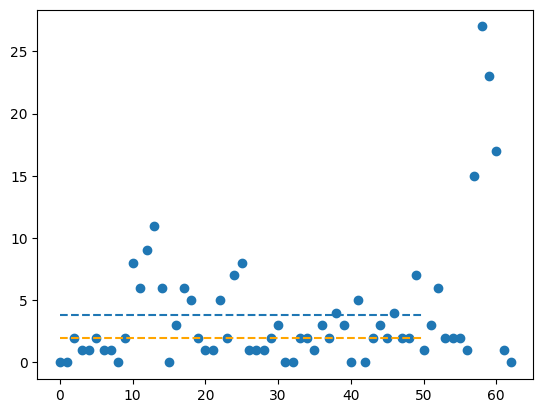

In [25]:
plt.scatter([x for x in range(len(error))],np.abs(error))
plt.hlines(np.mean(np.abs(error)),0,50,linestyle='--')
plt.hlines(np.median(np.abs(error)),0,50,linestyle='--',color='orange')
plt.show()

In [26]:
df_test = df_drift.copy()
df_test['error'] = error
df_test['truex'] = dx2
df_test['truey'] = dy2


In [27]:
df_test

,start,end,direction,coord,displacement,error,truex,truey
0,724,725,0,y,6,0.0,1.0,-6.0
1,725,726,0,y,5,0.0,1.0,-5.0
2,726,727,0,y,5,2.0,-1.0,-7.0
3,727,728,0,y,7,-1.0,-1.0,-6.0
4,728,729,0,y,6,1.0,0.0,-7.0
...,...,...,...,...,...,...,...,...
58,975,976,1,x,-1,27.0,28.0,1.0
59,976,977,1,x,-4,23.0,27.0,1.0
60,977,978,1,x,0,17.0,17.0,-1.0
61,978,979,1,x,0,1.0,1.0,2.0


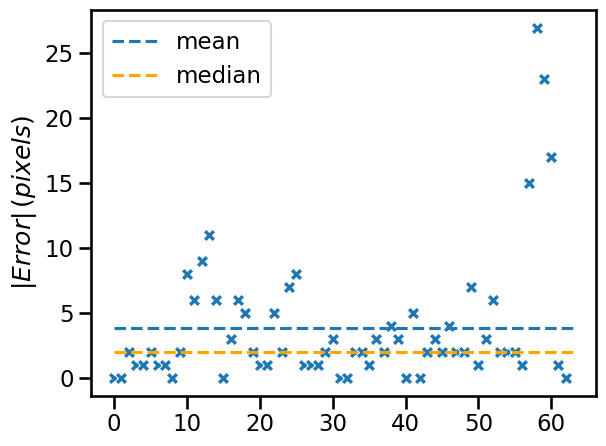

In [30]:
sns.set_context('talk')
sns.scatterplot(x=[x for x in range(len(df_test.error.values))],y=np.abs(df_test.error),marker='X')
plt.hlines(np.mean(np.abs(df_test.error)),0,63,linestyle='--',label='mean')
plt.hlines(np.median(np.abs(df_test.error)),0,63,linestyle='--',color='orange',label='median')
plt.ylabel('$|Error|\,(pixels)$')
#plt.xlim(0,50)
plt.tight_layout()
plt.legend()
plt.savefig('../data/results/figures/drift_correction/drift_measurement_error_thresholded.png',dpi=300)

plt.show()

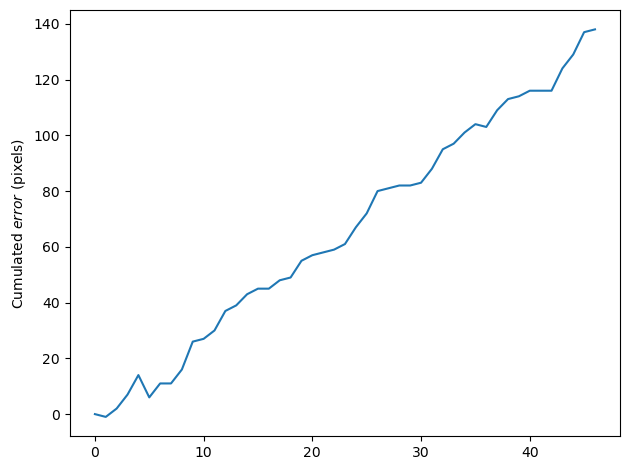

In [27]:
fig,ax = plt.subplots()

sns.lineplot([sum(error[0:x]) for x in range(len(error))],ax=ax)
ax.set_ylabel('Cumulated $error$ (pixels)')
plt.tight_layout()
plt.savefig('../data/results/figures/drift_correction/drift_measurement_error_thresholded_cumulated.png',dpi=300)

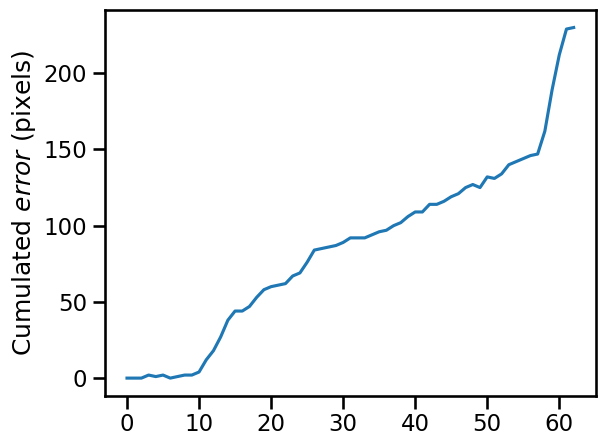

In [31]:
fig,ax = plt.subplots()

sns.lineplot([sum(error[0:x]) for x in range(len(error))],ax=ax)
ax.set_ylabel('Cumulated $error$ (pixels)')
plt.tight_layout()
#plt.savefig('../data/results/figures/drift_correction/drift_measurement_error_thresholded_cumulated.png',dpi=300)

In [ ]:
path_canva = '../data/tricho_8_wound_drift_visualization_bis.tif'
imwrite(path_canva,rescaled,compression='zlib')